## 1. Tokenization and Lemmatization
### 1.1. Theory
In NLP, we usually have to deal with texts from a variety of sources. 
#### Text sources
For instance, it can be a news article where the `text` is grammatically correct and proofread. It could be tweets containing shorthands and hashtags. 

It could also be comments on [YouTube](https://www.youtube.com/) where people have a tendency to abuse capital letters and punctuations.
#### Making text machine friendly
It is important that we standardize these texts into a machine friendly format. 
- We want our models to treat similar words as the same. Consider the words `Dogs` and `dog`. Strictly speaking, they are different strings. However, they connotate the same thing.
- Similarly, `reduction`, `reducing` and `reduce` should also be standardized to the same string regardless of their form and case usage. 
- Other examples include `don't` and `do not`, and `won't` and `will not`. 

#### Text preprocessing techniques
The text processing techniques you use are dependent on the application you're working on. We'll be covering the common ones, including 
- converting words into lowercase 
- removing unnecessary whitespace, removing punctuation, removing commonly occurring words or stopwords,
- expanding contracted words like `don't` (to `do not`) and
- removing special characters such as `numbers` and `emojis`.

#### Tokenization
To do this, we must first understand tokenization. 
- `Tokenization` is the process of splitting a string into its constituent tokens. 
- These tokens may be `sentences`, `words` or `punctuations` and is specific to a particular language. 

In this course, we will primarily be focused with word and punctuation tokens.

For instance, consider this sentence. 

        "I have a dog, His name is Hachi"

Tokenizing it into its constituent words and punctuations will yield the following list of tokens. 

Tokenization also involves expanding contracted words. 

Therefore, a word like `don't` gets decomposed into two tokens: `do` and `n't`.

#### Tokenization using spaCy
To perform tokenization in python, we will use the spacy library. We first import the spacy library. 

        import spacy
Next, we load a pre-trained English model `'en_core_web_sm'` using `spacy.load()`. 

        nlp = spacy.load('en_core_web_sm')        
This will return a Language object that has the know-how to perform tokenization. This is stored in the variable nlp. Let's now define a string we want to tokenize. We pass this string into `nlp` to generate a `spaCy Doc object`.

We store this in a variable named `doc`. 

        doc = nlp("Hello! I don't know what you are doing here!")
This Doc object contains the required tokens (and many other things, as we will soon find out). We generate the list of tokens by using list comprehension as shown. 

        tokens = [token.text for token in doc]
This is essentially looping over `doc` and extracting the text of each `token` in each iteration. The result is as follows.

#### Lemmatization
`Lemmatization` is the process of **converting a word into its lowercased `base form` or `lemma`**. 

This is an extremely powerful process of standardization. 

For instance, the words 
- `reducing`, `reduces`, `reduced` and `reduction`, when lemmatized, are all converted into the **base form `reduce`**. 
- Similarly **be verbs** such as `am`, `are` and `is` are converted into **`be`**. 

Lemmatization also allows us to convert words with apostrophes into their full forms.
- Therefore, `n't` is converted to `not` and `'ve` is converted to `have`.

#### Lemmatization using spaCy
        
        doc = nlp("Hello! I don't know what I am doing here!")
When you pass the string into `nlp`, `spaCy` automatically performs lemmatization by default.

Therefore, generating lemmas is identical to generating tokens except that we extract `token.lemma_` in each iteration inside the list comprehension instead of `token.text`. 

        lemmas = [token.lemma for token in doc]
Also, observe how spaCy converted the `I` into `-PRON-`. This is standard behavior where every pronoun is converted into the string `'-PRON-'`.

      [Out] : ['hello', '!', '-PRON-', 'do', 'not', 'know', 'what', '-PRON-', 'be', 'doing', 'here', '!']

### 1.2. PRACTICES
#### Exercise 1.2.1. Identifying lemmas
Identify the list of words from the choices which **do not have the same lemma**.

>- A. He, She, I, They
>- B. Am, Are, Is, Was
>- C. Increase, Increases, Increasing, Increased
>- D. Car, Bike, Truck, Bus

#### Answers.
>- A. Incorrect! All the words listed here are pronouns and will be lemmatized to `'-PRON-'`.
>- B. Wrong!! All the words here are be verbs and get lemmatized to `'be'`.
>- C. Incorrect! All these words have the same base form, `'increase'`.
>- D. **Correct!!** Although all these words refer to `vehicles`, they are words with `distinct base forms`.

#### Exercise 1.2.2. Tokenizing the Gettysburg Address
In this exercise, you will be tokenizing one of the most famous speeches of all time: the Gettysburg Address delivered by American President Abraham Lincoln during the `American Civil War`.

In [1]:
gettysburg = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth."

The entire speech is available as a string named `gettysburg`.
#### SOLUTION

In [2]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load("en_core_web_sm")

# Create a Doc object
doc = nlp(gettysburg)

# Generate the tokens
tokens = [token.text for token in doc]
print(tokens)

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "n't", 'dedicate', '-', 'we', '

#### Exercise 1.2.2. Lemmatizing the Gettysburg address
In this exercise, we will perform lemmatization on the same gettysburg address from before.

However, this time, we will also take a look at the speech, before and after lemmatization, and try to adjudge the kind of changes that take place to make the piece more machine friendly.
#### SOLUTION.

In [3]:
# Generate lemmas
lemmas = [token.lemma_ for token in doc]

# Convert lemmas into a string
print(' '.join(lemmas))

four score and seven year ago -PRON- father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now -PRON- be engage in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long endure . -PRON- be meet on a great battlefield of that war . -PRON- have come to dedicate a portion of that field , as a final resting place for those who here give -PRON- life that that nation may live . -PRON- be altogether fitting and proper that -PRON- should do this . but , in a large sense , -PRON- can not dedicate - -PRON- can not consecrate - -PRON- can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate -PRON- , far above -PRON- poor power to add or detract . the world will little note , nor long remember what -PRON- say here , but -PRON- can never forget what -PRON- do here . -PRON- be for -PRON- the living , rather , to be dedicate her

**Comments.**
Observe the lemmatized version of the speech. It isn't very readable to humans but it is in a much more convenient format for a machine to process.

## 2. Text cleaning
### 2.1. Theory.
#### Text cleaning techniques
Some of the most common text cleaning steps include 
- removing extra `whitespaces`, 
- escape `sequences`, `punctuations`, `special characters` such as numbers and `stopwords`. 

In other words, it is very common to remove non-alphabetic tokens and words that occur so commonly that they are not very useful for analysis.
#### isalpha()
Every python string has an `isalpha()` method that **returns true if all the characters of the string are alphabets**. 

Therefore, the `"Dog".isalpha()` will return `true` but `"3dogs".isalpha()` will return `false` as it has a non-alphabetic character 3. 

In [4]:
print("Dog".isalpha())
print("3dogs".isalpha())

True
False


Similarly, `numbers`, `punctuations` and `emojis` will all return **false** too. This is an extremely convenient method to remove all (lemmatized) tokens that are or contain numbers, punctuation and emojis.

In [5]:
print("123".isalpha())
print("!".isalpha())
print("#".isalpha())
print("@".isalpha())

False
False
False
False


#### A word of caution
If `isalpha()` as a silver bullet that cleans text meticulously seems too good to be true, it's because it is. 

Remember that `isalpha()` has a tendency of returning `false` on words we would not want to remove. 

Examples include 
- **abbreviations** such as `U.S.A` and `U.K` which have `periods` in them, and 
- **proper nouns** with `numbers` in them such as `word2vec` and `xto10x`. 

For such nuanced cases, `isalpha()` may not be sufficient. 
- It may be advisable to write your own **custom functions** (using `regex`), typically using regular expressions, to ensure you're **not inadvertently removing useful words**.

#### Removing non-alphabetic characters
Consider the string here. This has a lot of punctuations, unnecessary extra `whitespace`, `escape sequences`, `numbers` and `emojis`. We will generate the lemmatized tokens like before.

In [6]:
string = """ Hello all! Pergy love cats and fox is very fast. \n Peter is on the hole!! \n 
Barca lose Liverpool 4-5 at the semi-final Champion League 2019"""
doc = nlp(string)
lemmas = [token.lemma_ for token in doc]
print(lemmas)

[' ', 'hello', 'all', '!', 'Pergy', 'love', 'cat', 'and', 'fox', 'be', 'very', 'fast', '.', '\n ', 'Peter', 'be', 'on', 'the', 'hole', '!', '!', '\n \n', 'Barca', 'lose', 'Liverpool', '4', '-', '5', 'at', 'the', 'semi', '-', 'final', 'Champion', 'League', '2019']


Next, we loop through the tokens again and choose only those words that are either `-PRON-` or contain only `alphabetic characters`. 

In [7]:
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() or lemma == '-PRON-']

Let's now print out the `sanitized string`. We see that all the `non-alphabetic characters` have been removed and each word is separated by a single space.

In [8]:
print(' '.join(a_lemmas))

hello all Pergy love cat and fox be very fast Peter be on the hole Barca lose Liverpool at the semi final Champion League


#### Stopwords
There are some words in the English language that occur so commonly that it is often a good idea to just ignore them. 

Examples include articles such as a and the, be verbs such as is and am and pronouns such as `he` and `she`.

#### Removing stopwords using spaCy
`spaCy` has a built-in list of `stopwords` which we can access using `spacy.lang.en.stop_words.STOP_WORDS`.

In [9]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
len(stop_words)

326

We make a small tweak to `a_lemmas` generation step. 

Notice that we have removed the `-PRON-` condition as pronouns are stopwords anyway and should be removed.

In [10]:
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stop_words]
print(' '.join(a_lemmas))

hello Pergy love cat fox fast Peter hole Barca lose Liverpool semi final Champion League


- Additionally, we have introduced a new condition to check if the word belongs to spacy's list of stopwords. 
- The output is as follows.

Notice how the string consists only of base form words. Always exercise caution while using third party stopword lists. 

It is common that an application find certain words useful that may be considered a stopword by third party lists.

It is often advisable to create your custom stopword lists.

#### Other text preprocessing techniques
There are other preprocessing techniques that are used but have been omitted for the sake of brevity. Some of them include 
- `removing HTML` or `XML` `tags`, 
- `replacing accented characters` and 
- `correcting spelling errors` and `shorthands`

#### A word of caution
We have covered a lot of text preprocessing techniques in the last couple of lessons.

However, a word of caution is in place. The text preprocessing techniques you use is always dependent on the application. 

- There are many applications which may **find `punctuations`, `numbers` and `emojis` useful**, so it may **be wise to not remove them**. 
- In other cases, using all caps may be a good indicator of something. 

Remember to always use only those techniques that are relevant to your particular use case.

### 2.2. PRACTICES
#### Exercise 2.2.1. Cleaning a blog post
In this exercise, you have been given an excerpt from a `blog post`. 

In [11]:
blog = '\nTwenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.\n'

Your task is to clean this text into a more machine friendly format. This will involve converting to lowercase, lemmatization and removing stopwords, punctuations and non-alphabetic characters.

The excerpt is available as a string blog and has been printed to the console. The list of stopwords are available as stopwords.
#### SOLUTION.

In [12]:
# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(blog)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stop_words]

# Print string after text cleaning
print(' '.join(a_lemmas))

century politic witness alarm rise populism Europe warning sign come UK Brexit Referendum vote swinge way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include Alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


**Comments.**

Take a look at the cleaned text; it is lowercased and devoid of numbers, punctuations and commonly used stopwords. Also, note that the word U.S. was present in the original text. Since it had periods in between, our text cleaning process completely removed it. This may not be ideal behavior. It is always advisable to use your custom functions in place of isalpha() for more nuanced cases.

#### Exercise 2.2.3.

In [13]:
import pandas as pd
ted = pd.read_csv(r"../input/nlp-fe-datasets/ted.csv", 
                     usecols = ['transcript'])
ted.head(3)

,transcript
0,"We're going to talk — my — a new lecture, just..."
1,"This is a representation of your brain, and yo..."
2,It's a great honor today to share with you The...


In [14]:
# Function to preprocess text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stop_words]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'])

0      talk new lecture TED illusion create TED try r...
1      representation brain brain break left half log...
2      great honor today share Digital Universe creat...
3      passion music technology thing combination thi...
4      use want computer new program programming requ...
                             ...                        
495    today unpack example iconic design perfect sen...
496    brother belong demographic Pat percent accord ...
497    John Hockenberry great Tom want start question...
498    right moment kill More car internet little mob...
499    real problem math education right basically ha...
Name: transcript, Length: 500, dtype: object


## 3. Part-of-speech `(POS_)` tagging
### 3.1. Theory.
In this lesson, we will cover part-of-speech tagging, which is one of the most popularly used feature engineering techniques in `NLP`.
#### Applications
Part-of speech tagging or `POS tagging` has an immense number of applications in `NLP`. It is used in **word-sense disambiguation** to `identify the sense of a word in a sentence`.

For instance, consider the sentences `"the bear is a majestic animal"` and `"please bear with me"`. Both sentences use the word `'bear'` but they mean different things. 

`POS tagging` helps in **identifying this distinction** by identifying one bear as a `noun` and the other as a `verb`. 

Consequentially, `POS tagging` is also used in **sentiment analysis**, **question answering systems** and **linguistic** approaches to **detect fake news** and **opinion spam**. 

For example, one paper discovered that fake news headlines, on average, tend to use lesser common nouns and more proper nouns than mainstream headlines. Generating the `POS tags` for these words proved extremely useful in detecting false or `hyperpartisan news`.

#### POS tagging
So what is POS tagging? It is the process of assigning every word (or token) in a piece of text, its corresponding part-of-speech. For instance, consider the sentence `"Jane is an amazing guitarist"`. A `typical POS tagger` will label 
>- `Jane` as a `proper noun`, 
>- `is` as a `verb`, 
>- `an` as a `determiner` (or an `article`), 
>- `amazing` as an `adjective` and 
>- `guitarist` as a `noun`.


#### POS tagging using spaCy
`POS Tagging` is extremely easy to do using spaCy's models and performing it is almost identical to generating tokens or lemmas. As usual, we import the spacy library and load the `en_core_web_sm` model as `nlp`. 

We will use the same sentence `"Jane is an amazing guitarist"` from before. We will then create a `Doc object` that will perform `POS tagging` , by default.

In [15]:
doc = nlp("Jane is an amazing guitarist")
pos = [(token.text, token.pos_) for token in doc]
pos

[('Jane', 'PROPN'),
 ('is', 'AUX'),
 ('an', 'DET'),
 ('amazing', 'ADJ'),
 ('guitarist', 'NOUN')]

Using *list comprehension*, we generate a list of `tuples pos` where 
- the first element of the tuple is the `token` and is generated using `token.text` and 
- the second element is its `POS tag`, which is generated using `token.pos_`. 

Printing `pos` will give us the following output. Note how the tagger correctly identified all the parts-of-speech as we had discussed earlier. That said, remember that `POS tagging` is not an exact science. 

`spaCy` infers the `POS tags` of these words based on the predictions given by its pre-trained models. In other words, the accuracy of the `POS tagging` is dependent on the data that the model has been trained on and the data that it is being used on.

#### POS annotations in spaCy
`spaCy` is capable of identifying close to 20 parts-of-speech and as we saw in the previous slide, it uses specific annotations to denote a particular part of speech. For instance, 
- `PROPN` referred to a `proper noun` and 
- `DET` referred to a `determinant`. 

You can find the complete list of `POS annotations` used by `spaCy` in `spaCy's documentation`. 

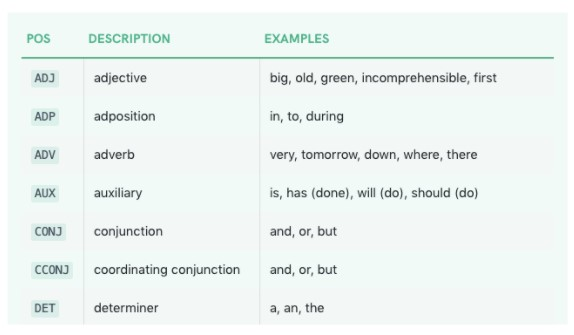

In [16]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

### 3.2. PRACTICES
#### Exercise 3.2.1. POS tagging in Lord of the Flies
In this exercise, you will perform `part-of-speech` tagging on a famous passage from one of the most well-known novels of all time, Lord of the Flies, authored by William Golding.

The passage is available as `lotf`.

In [17]:
lotf = 'He found himself understanding the wearisomeness of this life, where every path was an improvisation and a considerable part of one’s waking life was spent watching one’s feet.'

#### SOLUTION

In [18]:
# Load the en_core_web_sm model
nlp = spacy.load("en_core_web_sm")

# Create a Doc object
doc = nlp(lotf)

# Generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('He', 'PRON'), ('found', 'VERB'), ('himself', 'PRON'), ('understanding', 'VERB'), ('the', 'DET'), ('wearisomeness', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('life', 'NOUN'), (',', 'PUNCT'), ('where', 'ADV'), ('every', 'DET'), ('path', 'NOUN'), ('was', 'AUX'), ('an', 'DET'), ('improvisation', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('considerable', 'ADJ'), ('part', 'NOUN'), ('of', 'ADP'), ('one', 'NOUN'), ('’s', 'PART'), ('waking', 'VERB'), ('life', 'NOUN'), ('was', 'AUX'), ('spent', 'VERB'), ('watching', 'VERB'), ('one', 'PRON'), ('’s', 'PART'), ('feet', 'NOUN'), ('.', 'PUNCT')]


#### Exercise 3.2.2. Counting nouns in a piece of text
> In this exercise, we will write two functions,
- `nouns()` and 
- `proper_nouns()` 

> that will count the number of other nouns and proper nouns in a piece of text respectively.

These functions will take in a piece of text and generate a list containing the `POS tags` for each word. 

It will then return the number of `proper nouns/other nouns` that the text contains.

We will use these functions in the next exercise to generate interesting insights about `fake news`.
#### SOLUTION.
**Step 1.** Using the list `count` method, count the number of `proper nouns` (annotated as `PROPN`) in the `pos` list.

In [19]:
# Returns number of proper nouns
def proper_nouns(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3


**Step 2.** Using the list `count method`, count the number of other nouns (annotated as `NOUN`) in the pos list.

In [20]:
# Returns number of other nouns
def nouns(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

2


#### Exercise 3.2.3. Noun usage in fake news
In this exercise, you have been given a dataframe headlines that contains news headlines that are either fake or real.

In [21]:
headlines = pd.read_csv(r"../input/nlp-fe-datasets/fakenews.csv", 
                        usecols = ["title", "label"])
headlines.head(3)

,title,label
0,You Can Smell Hillary’s Fear,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy,REAL


Your task is to generate two new features num_propn and num_noun that represent the number of proper nouns and other nouns contained in the title feature of headlines.

Next, we will compute the mean number of proper nouns and other nouns used in fake and real news headlines and compare the values. If there is a remarkable difference, then there is a good chance that using the `num_propn` and `num_noun` features in `fake news` detectors will improve its performance.

To accomplish this task, the functions `proper_nouns` and `nouns` that you had built in the previous exercise have already been made available to you.
#### SOLUTION.
**Step 1.** Create a feature `'num_propn'` using function `proper_nouns` then calculate the means.

In [22]:
headlines['num_propn'] = headlines['title'].apply(proper_nouns)

# Compute mean of proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()

# Print results
print("Mean no. of proper nouns in real and fake headlines are %.2f and %.2f respectively"%(real_propn, fake_propn))

Mean no. of proper nouns in real and fake headlines are 2.42 and 4.58 respectively


**Step 2.** Create a feature `'num_noun'` using function `nouns` then calculate the means.

In [23]:
headlines['num_noun'] = headlines['title'].apply(nouns)

# Compute mean of other nouns
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

# Print results
print("Mean no. of other nouns in real and fake headlines are %.2f and %.2f respectively"%(real_noun, fake_noun))

Mean no. of other nouns in real and fake headlines are 2.30 and 1.67 respectively


**Comments.**

Notice how the mean number of proper nouns is considerably higher for fake news than it is for real news. 

The opposite seems to be true in the case of other nouns. This fact can be put to great use in designing fake news detectors.

## 4. Named entity recognition
### 4.1. Theory.
#### Applications
`Named entity recognition` or **NER** has a host of extremely useful applications. 
- It is used to build **efficient search algorithms** and **question answering systems**. For instance, let us say you have a piece of text and you ask your system about the people that are being talked about in the text. `NER` would help the system in answering this question by identifying all the entities that refer to a person in the text. 
- `NER` also found application with News Providers who use it to **categorize their articles** and **Customer Service** centers who use it to classify and record their complaints efficiently.

#### Named entity recognition
Let us now get down to the definitions. A named entity is anything that can be denoted with a proper name or a proper noun. 
- Named entity recognition or `NER`, therefore, is the process of **identifying** such `named entities in a piece of text` **and classifying** them into predefined categories such as `person`, `organization`, `country`, etc. 
- For example, consider the text `"John Doe is a software engineer working at Google. He lives in France."` 
- Performing `NER` on this text will tell us that there are three named entities: 
>- `John Doe`, who is a `person`, 
>- `Google`, which is an `organization` and 
>- `France`, which is a `country` (or `geopolitical entity`)

#### NER using spaCy
Like `POS` tagging, performing `NER` is extremely easy using `spaCy's pre-trained` models. 

Let's try to find the named entities in the same sentence we used earlier. 

In [24]:
my_text = "John Doe is a software engineer working at Google. He lives in France."
doc = nlp(my_text)

As usual, we import the spacy library, load the required model and create a `Doc object` for the string. When we do this, spaCy automatically computes all the named entities and makes it available as the ents attribute of `doc`. 

Therefore, to access the named entity and its category, we use *list comprehension* to loop over doc.ents and create a tuple containing the entity name, which is accessed using ent.text, and entity category, which is accessed using `ent.label_`. 

In [25]:
NE = [(ent.text, ent.label_) for ent in doc.ents]

Printing this list out will give the following output. We see that spaCy has correctly identified and classified all the named entities in this string.

In [26]:
NE

[('John Doe', 'PERSON'), ('Google', 'ORG'), ('France', 'GPE')]

#### NER annotations in spaCy
Currently, spaCy's models are capable of identifying more than 15 different types of named entities.

The complete list of categories and their annotations can be found in spaCy's documentatiion.

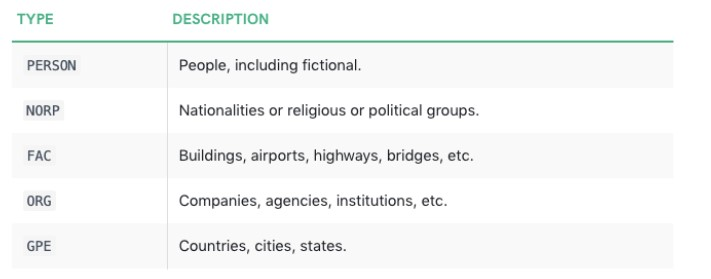

In [27]:
## Hình minh họa Image(fig1, height, width)

####  A word of caution
In this chapter, we have used `spacy's models` to accomplish several tasks. 

- However, remember that spacy's models are **not perfect** and its **performance depends on the data** it was trained with and the data it is being used on. For instance, if we are trying extract named entities for texts from a heavily technical field, such as medicine, spacy's pretrained models may not perform such a great job. 
- In such **nuanced cases**, it is **better** to train your models with your **specialized data**. Also, remember that `spacy's models` are language specific. This is understandable considering that each language has its own grammar and nuances. The `en_core_web_sm` model that we've been using is, as the name suggests, only suitable for English texts.

### 4.2. PRACTICES
#### Exercise 4.2.1. Named entities in a sentence
In this exercise, we will identify and classify the labels of various named entities in a body of text using one of spaCy's statistical models. We will also verify the veracity of these labels.
#### SOLUTION

In [28]:
# Load the required model
nlp = spacy.load("en_core_web_sm")

# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

Sundar Pichai PERSON
Google ORG
Mountain View GPE


**Comments**

Notice how the model correctly predicted the labels of Google and Mountain View but mislabeled Sundar Pichai as an organization. 

As discussed in the theory, the predictions of the model depend strongly on the data it is trained on. It is possible to train spaCy models on your custom data. 

#### Exercise 4.2.2. Identifying people mentioned in a news article
In this exercise, you have been given an excerpt from a news article published in `TechCrunch`. Your task is to write a function find_people that identifies the names of people that have been mentioned in a particular piece of text. You will then use find_people to identify the people of interest in the article.

In [29]:
tc = "\nIt’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it.\n"

The article is available as the string tc and has been printed to the console. The required spacy model has also been already loaded as `nlp`.
#### SOLUTION,

In [30]:
def find_persons(text):
  # Create Doc object
    doc = nlp(text)
  
  # Identify the persons
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  
  # Return persons
    return persons

print(find_persons(tc))

['Sheryl Sandberg', 'Mark Zuckerberg']


**Comments.**

The article was related to Facebook and our function correctly identified both the people mentioned. You can now see how NER could be used in a variety of applications. Publishers may use a technique like this to classify news articles by the people mentioned in them. 

A question answering system could also use something like this to answer questions such as `'Who are the people mentioned in this passage?'`.